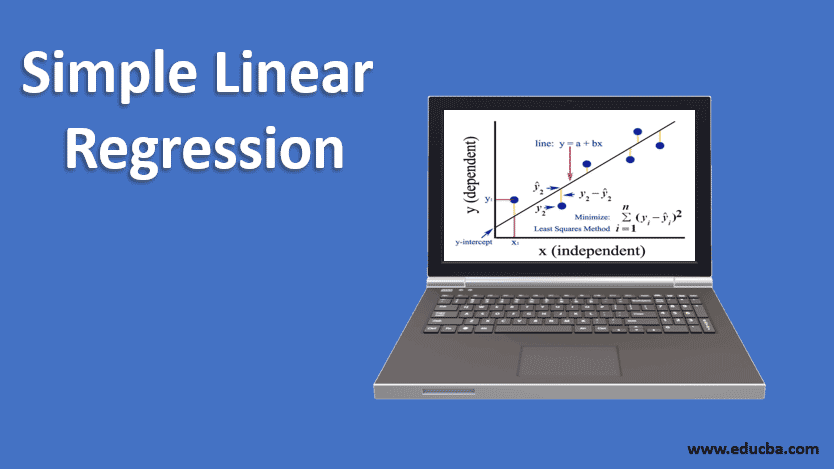

In [76]:
from IPython.display import Image
Image('T:\\images for linkedlin\\simple-linear-regressions.png',width =300,height =400)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# lets load the dataset
ds = pd.read_csv('T:\\python\\class\\data.csv')
ds

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [79]:
ds.shape

(15, 2)

In [80]:
# lets check null value is present or not
ds.isnull().sum()

Height    0
Weight    0
dtype: int64

In [81]:
# step1: lets spilt the data into independent and dependent variable

x = ds['Height']
y = ds['Weight']

In [82]:
x.head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

In [83]:
len(x),len(y)

(15, 15)

In [84]:
x.shape

(15,)

In [85]:
x.ndim

1

In [86]:
# step 2 : here it is 1d where independent variable should have 2d array so lets convert it 2d

In [87]:
x = x.values.reshape(-1,1) # -1 is actual dim and 1 indicates add column


In [88]:
x.ndim

2

In [89]:
x.shape

(15, 1)

In [90]:
# step 3: data given to algorithm 

# training the data to train with algorithm

In [91]:
import sklearn

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [94]:
# table form training_data
training_data = pd.DataFrame({'X_train':x_train.flatten(),'Y_train':y_train})

In [95]:
training_data # 20/100 *15 = 12 rows

,X_train,Y_train
13,1.80,72.19
5,1.60,58.57
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12
14,1.83,74.46
4,1.57,57.20
7,1.65,61.29
10,1.73,66.28
12,1.78,69.92


In [96]:
training_data.shape

(12, 2)

In [97]:
# step 4

# testing the data to test with algorithm

In [98]:
testing_data = pd.DataFrame({'X_test':x_test.flatten(),'Y_test':y_test})

In [99]:
testing_data

,X_test,Y_test
9,1.70,64.47
11,1.75,68.10
0,1.47,52.21


In [100]:
testing_data.shape

(3, 2)

In [101]:
# step 5: let check the train data internally related by graphical representation

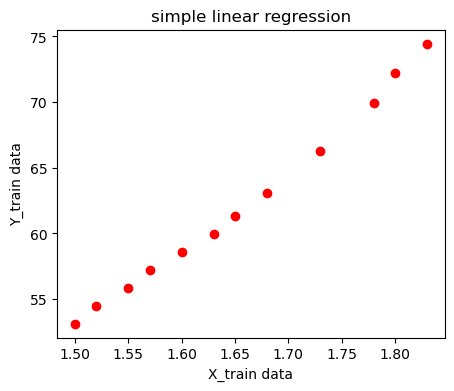

In [107]:
plt.figure(figsize=(5,4))
plt.scatter(x = x_train,y=y_train,color ='r')
plt.xlabel("X_train data")
plt.ylabel("Y_train data")
plt.title("simple linear regression")
plt.show()

In [110]:
# step 6:Algorithm given to model to develop it
# SLR y = mx+c

In [111]:
from sklearn.linear_model import LinearRegression

In [113]:
reg = LinearRegression()

In [114]:
reg.fit(x_train,y_train)

LinearRegression()

In [115]:
# m value
reg.coef_

array([63.13171913])

In [116]:
# c value
reg.intercept_

-42.178608958837785

In [117]:
training_data.head()

,X_train,Y_train
13,1.80,72.19
5,1.60,58.57
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12


In [118]:
# Simple Linear Regression
#  y = 63.13171913 x - 42.178608958837785
63.13171913 * 1.80-42.178608958837785

71.45848547516222

In [119]:
# step 7: lets train model make predictions

In [120]:
y_train_predict = reg.predict(x_train)

In [121]:
y_train_predict

array([71.45848547, 58.83214165, 63.88267918, 53.78160412, 52.51896973,
       73.35243705, 56.93819007, 61.9887276 , 67.03926513, 70.19585109,
       55.67555569, 60.72609322])

In [122]:
# add them to training data
training_data['y_train_predict']=y_train_predict

In [123]:
training_data

,X_train,Y_train,y_train_predict
13,1.80,72.19,71.458485
5,1.60,58.57,58.832142
8,1.68,63.11,63.882679
2,1.52,54.48,53.781604
1,1.50,53.12,52.518970
14,1.83,74.46,73.352437
4,1.57,57.20,56.938190
7,1.65,61.29,61.988728
10,1.73,66.28,67.039265
12,1.78,69.92,70.195851


In [124]:
# lets check the model of predict data by graphical representation

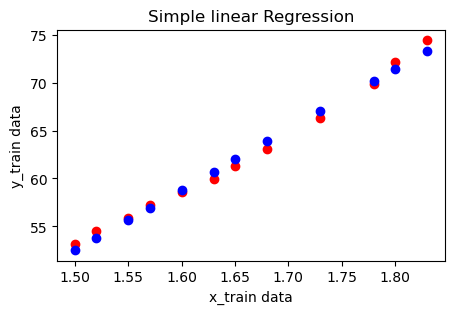

In [128]:
plt.figure(figsize=(5,3))
plt.scatter(x=x_train,y=y_train,color ='r')
plt.scatter(x = x_train,y=y_train_predict,color='b')
plt.xlabel('x_train data')
plt.ylabel('y_train data')
plt.title("Simple linear Regression")
plt.show()

In [129]:
# step 8: Finding the loss of training data


In [130]:
from sklearn.metrics import r2_score # finding the accurancy of loss

In [132]:
print(f'model training data accurancy:{r2_score(y_train,y_train_predict)}') # [actualpoint-predication]square

model training data accurancy:0.9907071189933878


In [133]:
print(f'training loss data :{1-r2_score(y_train,y_train_predict)}') 

training loss data :0.009292881006612186


In [134]:
0.9907071189933878 + 0.009292881006612186

1.0

In [135]:
# finally its 100 % most accurate to the model

In [136]:
# step 9 : check with testing data 

In [137]:
# test data predications

In [138]:
y_test_predict = reg.predict(x_test)

In [139]:
y_test_predict

array([65.14531356, 68.30189952, 50.62501816])

In [140]:
# add them to testing_data
testing_data['y_test_predict']=y_test_predict

In [141]:
testing_data

,X_test,Y_test,y_test_predict
9,1.70,64.47,65.145314
11,1.75,68.10,68.301900
0,1.47,52.21,50.625018


In [142]:
print(f'model testing data accurancy:{r2_score(y_test,y_test_predict)}')

model testing data accurancy:0.9782994097388882


In [143]:
print(f'testing loss data :{1-r2_score(y_test,y_test_predict)}') 

testing loss data :0.02170059026111182


In [144]:
0.9782994097388882 + 0.02170059026111182

1.0

In [145]:
# now we get 97% accurancy & testing data is a perfect model and we can use in our data

In [146]:
# step 10... check the 2.00 feet of height

In [149]:
reg.predict([[2.00]])

array([84.0848293])

In [150]:
y = 63.13171913 * 2.00 - 42.178608958837785
y

84.08482930116222

In [151]:
reg.predict([[5.6]])

array([311.35901816])

In [152]:
y = 63.13171913 * 5.6 - 42.178608958837785
y

311.3590181691622